# Basic plotting in R

<div class="alert alert-info">

### This is a Jupyter notebook

You can learn all about the Jupyter interface [here](https://realpython.com/jupyter-notebook-introduction/)

Some basics: 
Jupyter has two modes: command and edit. When you click a cell, you enter ```edit mode``` and you can edit its contents. To exit ```edit mode```, you press ```ESC```.

* Cells can be either code cells or text (or markdown) cells
* To run cells, press Shift+enter 
* To turn a cell into a text cell, press `m` (markdown) in command mode
* To create a new cell use `b` (new cell below) or `a` (above) in command mode

</div>

In [8]:
# this just sets the graphs to not be HUGE - you don't have to do it
options(repr.plot.width=4, repr.plot.height=4)

## Setting working directory

First we set working directory (wd) to the place where our datafiles are:

In [4]:
setwd("./datasets/HumanLifeExpectancy")

In [ ]:
You can check that you are in the correct working directory by listing the files there:

In [2]:
dir()

[1] "HumanLifeExpectancy.txt"       "LifeExpectancyPlot.R"         
[3] "NormalisedLifeExpectancy.txt"  "NormalisedLifeExpectancy.xlsx"

Alternatively, you can check the directory you are in directly, using the function ```getwd()```

In [6]:
getwd()

[1] "C:/Users/paixao/Documents/Projects/stats_with_r_tutorial/datasets/HumanLifeExpectancy"

## Reading datafiles

We then read a datafile using the ```read.table``` command. 

The option ```header``` specifies if the first line (or row) has the names of the columns.
The option ```sep``` specifies which character separates the data values. In this case it is the ```tab``` character which is specified as ```\t```. Another common option is ```,```


In [5]:
mytable <- read.table("HumanLifeExpectancy.txt", header=TRUE,sep="\t")

<div class="alert alert-info">

**Assignments**: In R, you can assign variables using either `<-` or `=`. Up to your personal taste.

</div>

The command `head()` prints only the top x rows of the table

In [6]:
head(mytable,5)

Year,Life.Expectancy,Country
<int>,<dbl>,<fct>
1840,45.71,Sweden
1843,47.90,Norway
1848,48.64,Norway
1853,51.19,Norway
1858,51.73,Norway


<div class="alert alert-info">

You can also read Excel files with `read.xlsx`. For this you need to `require(openxlsx)` which, in turn, requires you to have that package installed.

</div>

### Tables

In general, a table can be addressed by `table[row,col]`.

The file we read has three columns named `Year`, `Life.Expectancy` and `Country`. You can refer to each of the columns by `table$column` or by `table[,'column']`.

<div class="alert alert-danger">

**Notice** that if your column names have spaces you have to use `table[,"column_name"]`

</div>

You can get all the column names using the function `colnames()`. In the same way, you can get the names of the rows using `rownames()`

In [14]:
# getting the column names
colnames(mytable)
# getting the row names
rownames(mytable)



[1] "Year"            "Life.Expectancy" "Country"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58" "59" "60"
[61] "61" "62" "63" "64" "65" "66" "67" "68" "69" "70" "71" "72" "73" "74"

You can rename columns by using `colnames`:

In [16]:
colnames(mytable)[2]<-"LifeExpectancy"
colnames(mytable)

[1] "Year"           "LifeExpectancy" "Country"

So, we have 3 columns: `Year`, `LifeExpectancy`, and `Country` and we have $74$ rows of data. Let's try to see how these variables are correlated. To get a pretty good description of a data table you can simply plot the table. R will plot every column against every other column.

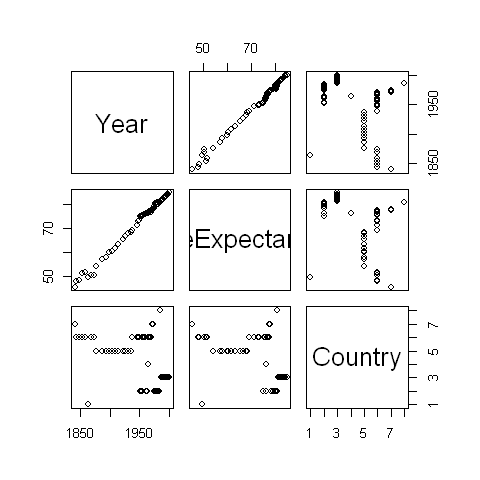

In [18]:
plot(mytable)

You can also get a lot of information about a table (any R object, really) by using `attributes()`

In [19]:
attributes(mytable)

$names
[1] "Year"           "LifeExpectancy" "Country"       

$class
[1] "data.frame"

$row.names
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74

## Plotting


Let's now plot the data in the table in a more intelligible way. Notice that each row has three pieces of information: `Life Expectancy`, `Year`, and `Country`. `LifeExpectancy` and `Year` are numerical values but `Country` is a *categorical* variable. R knows this, and immediately assigns integer numbers to each of the categories.

To see this, let's plot `LifeExpectancy` against `Country`.

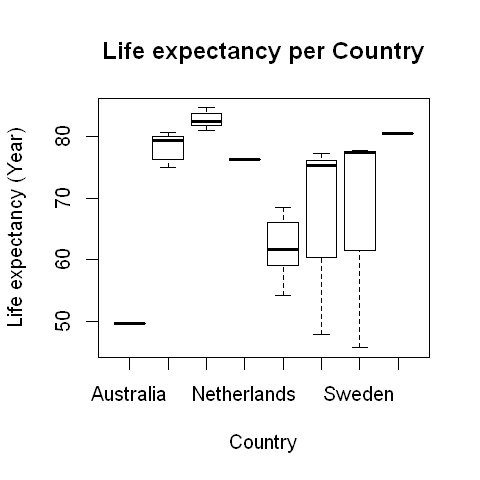

In [23]:
plot(mytable$Country, mytable$LifeExpectancy,main="Life expectancy per Country",xlab="Country", ylab="Life expectancy (Year)")

As you can see, `plot()` is very smart. It recognizes that in the `xx` axis there is a categorical variable and that for each of its values there are many numerical `yy` values. It then decides that the best kind of plot is a series of [box plots](https://en.wikipedia.org/wiki/Box_plot). You can force R to use different types of plot. More on that later.

<div class="alert alert-info">
    
To know more about any command you can always do `help(command)`. Or google...

</div>

R did not plot labels for all the countries. Let's fix that. First, the `levels()` function will return the unique categorical values, in the order that R uses them. We will use this for the labels.


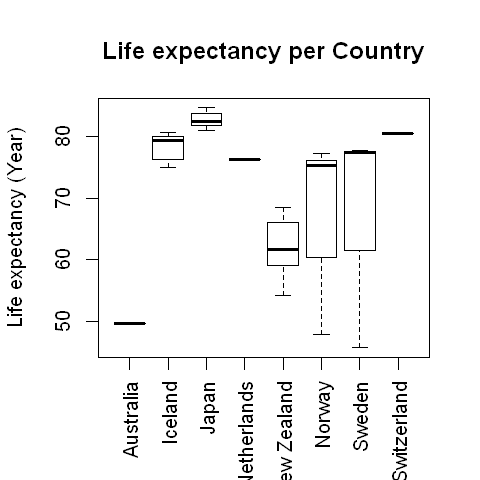

In [58]:
labs = levels(mytable$Country)
nlabs= nlevels(mytable$Country)

plot(mytable$Country, mytable$LifeExpectancy,xaxt="n",main="Life expectancy per Country",xlab="", ylab="Life expectancy (Year)")

axis(side=1, at=1:nlabs, labels=labs,las=2)

Obviously, howver and in spite of **R**\'s smarts, this is **not** the right graph to do with this data. This is because the data that it is using to build the box plots is life expectancies in different years. Clearly not a Good Choice (tm). 

The more obvious choice is to plot Life Expectancy as a function of the year in which it was measured.

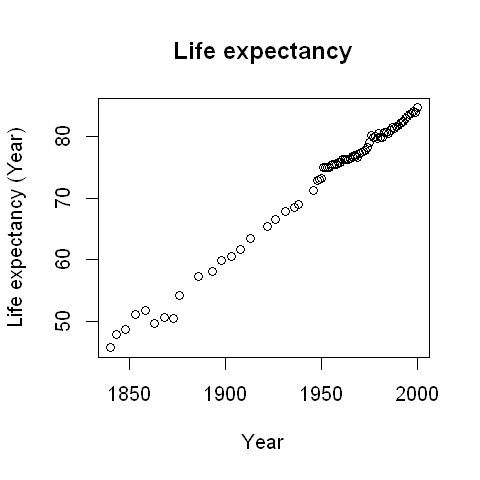

In [60]:
plot(mytable$Year, mytable$LifeExpectancy,main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)")


That seems more intelligible! However, it would be good to differentiate between countries. We know there are data for $8$ countries (as `nlevels(mytable)` will tell you). So, let's pick 8 colors and use them to color data points from the different countries:

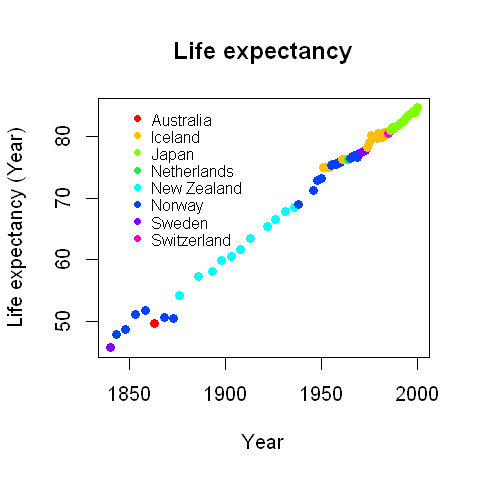

In [86]:
color = rainbow(8) # this chooses 8 colors from the rainbow

# color[mytable$Country]

plot(mytable$Year, mytable$LifeExpectancy,main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)",pch=16,col=color[mytable$Country])

legend(1850,85,legend=levels(mytable$Country),col=color,pch=16,box.lty=0,y.intersp = 2,x.intersp=2,cex=.8)

This one was a bit though. Let's break it down:

```
plot(mytable$Year, mytable$LifeExpectancy,main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)", pch=16, col=color[mytable$Country])
```

the parameters that we used were:

* `main`: sets the title of the plot
* `xlab` and `ylab` set the labels for the x and y axes
* `pch` (**p**rint **ch**aracter) sets the character that is used for each point. Numerical values are different symbols. Experiment with them.
* `col` (**col**ors) sets the color for each individual point. It should be a vector of the same size as the data, with the color of each datapoint

the `color` variable is a vector of 8 colors. `mytable$Country` has the countries, but **R** will interpret them also as numerical values from 1 to 8 (the levels). So, `color[mytable$Country]` will be a vector of the size of `mytable$Country` (the number of rows in the table) with a color at each entry corresponding to the color of the country.

After that, we use the `legend()` function, to plot the legend (captain obvious). 
The parameters for the legend() function are as follows:

* `x,y` determine the position of the legend
* `legend` sets the labels. In this case, we use `levels(mytable$Country)` which returns the list of countries that **R** determined to be categorical values.

the rest of the paramters just control the looks of the legend. They should match the style you used in the plot.

<div class="alert alert-info">

**Remember**: You can learn more about **any** function using `help()`

</div>



## Calculating on tables

So far, we read a table and plotted the data in there. What if we need to calculate derived values for each row in the data?



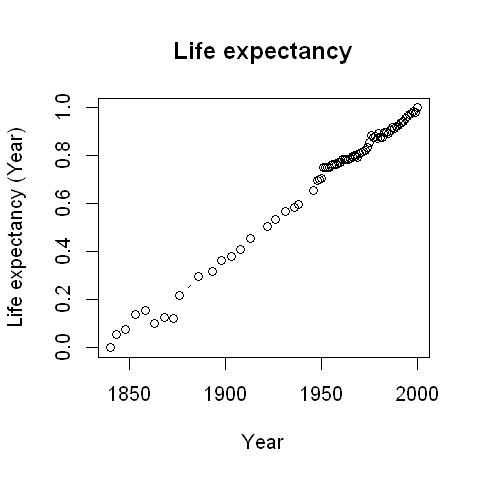

In [87]:

mytable$NormalisedLifeExpectancy<-mytable$LifeExpectancy

mi<-min(mytable$LifeExpectancy)
ma<-max(mytable$LifeExpectancy)
range<-ma-mi

range<-max(mytable$LifeExpectancy)-min(mytable$LifeExpectancy)

mytable$NormalisedLifeExpectancy<-(mytable$LifeExpectancy-mi)/range


plot(mytable$Year, mytable$NormalisedLifeExpectancy,t="b",main="Life expectancy",xlab="Year", ylab="Normalized Life expectancy")


## Writing files

Finally, you probably would like to write this to a file. This is pretty simple: simply use `write.table`. Like so:

In [ ]:
# writing to files

write.table(mytable[,c(1,4,3)],"NormalisedLifeExpectancy_mine.txt",sep="\t",row.names=FALSE)



In [89]:
help(write.table)